In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

In [58]:
greenSpotify = 'rgb(30, 215, 96)'   # the official green spotify uses
blackSpotify = 'rgb(25, 20, 20)'    # the official black spotify uses - for either only the user or the whole background
lightblackSpotify = 'rgb(41, 40, 40)'   # the other black - so its not so monotone

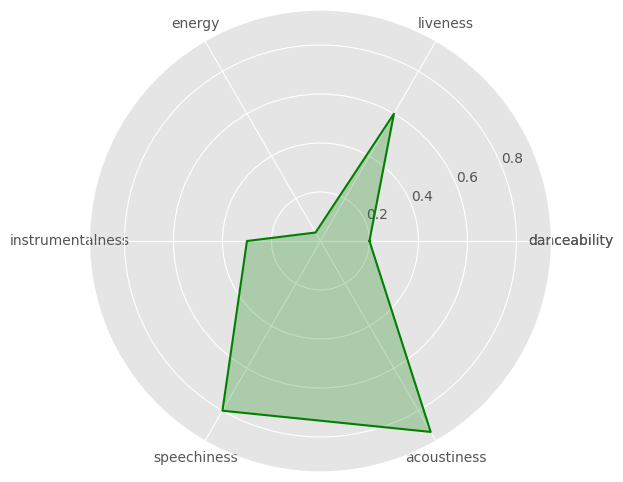

In [3]:
def spiderPlotFeatures(dance, live, energy, instru, speech, acoust):
    subjects = ["danceability", "liveness", "energy", "instrumentalness", "speechiness", "acoustiness"]
    data = [dance, live, energy, instru, speech, acoust]
    angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    subjects.append(subjects[0])
    data.append(data[0])  

    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(polar=True)
    ax.plot(angles,data, color='g')
    ax.fill(angles, data, alpha=0.25, color='g')
    ax.set_thetagrids(angles * 180/np.pi, subjects)

    plt.show()

spiderPlotFeatures(0.2, 0.6, 0.04, 0.3, 0.8, 0.9)


In [61]:
# -------- Time Plot ----------------------------


def timelineTracks(col_tracks, col_time):
    colTime = pd.to_datetime(col_time)
    df_timeline = pd.DataFrame({'col_time': colTime,'col_tracks': col_tracks})

    fig = px.scatter(df_timeline, x='col_time', y= [0] * len(col_time) , 
                     title = "Time Line of the last Songs you've listened to" ,
                     hover_name = 'col_tracks',
                     hover_data = {'col_time': False, 'col_tracks':False},
                     color_discrete_sequence=[greenSpotify])
                     
    
    fig.update_traces(marker=dict(size= 15, opacity=0.6), 
                      hovertemplate='<b>%{text}</b><br><br>%{x}',
                      text=df_timeline['col_tracks'],
                      hoverlabel=dict(bgcolor=greenSpotify))

    fig.add_hline(y=0, line_color=greenSpotify)

    fig.update_xaxes(title_text=' ')

    fig.update_layout(
        margin=dict(l=0, r=0, t=30, b=10),
        hoverlabel=dict(
        font_size=13
        ),
        plot_bgcolor=blackSpotify,  
        yaxis=dict(visible=False),
        showlegend=False
    )

    return fig



In [77]:
# -------- Radar(Spider) Plot ----------------------------

def radarPlot(dance, live, energy, instru, speech, acoust):
    subjects = ["danceability", "liveness", "energy", "instrumentalness", "speechiness", "acoustiness"]
    values = [dance, live, energy, instru, speech, acoust]
    
    df_radar = pd.DataFrame({'subjects': subjects,'values': values})

    fig = px.line_polar(df_radar, r='values', theta='subjects', 
                        line_close=True,
                        color_discrete_sequence=[greenSpotify])
    
    fig.update_traces(fill="toself")

    fig.update_polars(bgcolor=blackSpotify)
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                tickfont=dict(color='white'),
                tickvals=[0, 0.2, 0.4, 0.6, 0.8]  # Change the font color of the tick labels to red
            )
        )
    )

    return fig

In [78]:
radarPlot(0.2, 0.6, 0.04, 0.3, 0.8, 0.9)

/Users/clarapichler/miniconda3/envs/infoVis/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'fill': 'toself',
              'hovertemplate': 'values=%{r}<br>subjects=%{theta}<extra></extra>',
              'legendgroup': '',
              'line': {'color': 'rgb(30, 215, 96)', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'r': array([0.2 , 0.6 , 0.04, 0.3 , 0.8 , 0.9 , 0.2 ]),
              'showlegend': False,
              'subplot': 'polar',
              'theta': array(['danceability', 'liveness', 'energy', 'instrumentalness', 'speechiness',
                              'acoustiness', 'danceability'], dtype=object),
              'type': 'scatterpolar'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'polar': {'angularaxis': {'direction': 'clockwise', 'rotation': 90},
                         'bgcolor': 'rgb(25, 20, 20)',
                         'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'radialaxis': {'tickfont': {'color': 'white'}, 'tickvals': [0, 0.2, 0.4, 0.6, 0.8]}},
               'template': '...'}
})

In [62]:
times = ["2023-06-12T16:06:43.007Z", "2023-06-12T16:42:41.080Z", "2023-06-11T16:02:41.080Z", "2023-06-11T22:02:41.080Z", "2023-06-12T01:02:41.080Z" ]
tracks = ["song - 12.6 um 16:06", "song - 12.6 um 16:02", "song - 11.6 um 16:02", "song - 11.6 um 22", "song - 12.6 um 01"]
timelineTracks(tracks, times)

                          col_time            col_tracks
0 2023-06-12 16:06:43.007000+00:00  song - 12.6 um 16:06
1 2023-06-12 16:42:41.080000+00:00  song - 12.6 um 16:02
2 2023-06-11 16:02:41.080000+00:00  song - 11.6 um 16:02
3 2023-06-11 22:02:41.080000+00:00     song - 11.6 um 22
4 2023-06-12 01:02:41.080000+00:00     song - 12.6 um 01


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['song - 12.6 um 16:06'],
                                   ['song - 12.6 um 16:02'],
                                   ['song - 11.6 um 16:02'],
                                   ['song - 11.6 um 22'],
                                   ['song - 12.6 um 01']], dtype=object),
              'hoverlabel': {'bgcolor': 'rgb(30, 215, 96)'},
              'hovertemplate': '<b>%{text}</b><br><br>%{x}',
              'hovertext': array(['song - 12.6 um 16:06', 'song - 12.6 um 16:02', 'song - 11.6 um 16:02',
                                  'song - 11.6 um 22', 'song - 12.6 um 01'], dtype=object),
              'legendgroup': '',
              'marker': {'color': 'rgb(30, 215, 96)', 'opacity': 0.6, 'size': 15, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'text': array(['song - 12.6 um 16:06', 'song - 12.6 um 16:02', 'song - 11.6 um 16:02',
                             'song - 11.6 um 22', 'song - 12.6 um 01'], dtype=object),
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 6, 12, 16, 6, 43, 7000, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 12, 16, 42, 41, 80000, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 11, 16, 2, 41, 80000, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 11, 22, 2, 41, 80000, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 12, 1, 2, 41, 80000, tzinfo=<UTC>)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0, 0, 0, 0, 0]),
              'yaxis': 'y'}],
    'layout': {'hoverlabel': {'font': {'size': 13}},
               'legend': {'tracegroupgap': 0},
               'margin': {'b': 10, 'l': 0, 'r': 0, 't': 30},
               'plot_bgcolor': 'rgb(25, 20, 20)',
               'shapes': [{'line': {'color': 'rgb(30, 215, 96)'},
                           'type': 'line',
                           'x0': 0,
                           'x1': 1,
                           'xref': 'x domain',
                           'y0': 0,
                           'y1': 0,
                           'yref': 'y'}],
               'showlegend': False,
               'template': '...',
               'title': {'text': "Time Line of last Songs you've listened to"},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': ' '}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}, 'visible': False}}
})

In [ ]:
# -------- Spider Plot ----------------------------
